In [ ]:
#Description of Trends
# 1) While all other drugs increase tumour volume as time passes, Capomulin decreases tumour volume and metastatic spread.
# 2) For the rest, Infubinol < Placebo < Ketapril is the order in which tumor volume increases as time progresses.
# 3) For metastatic spread, the order of increasing sites as time passes is Infubinol < Ketapril < Placebo


In [19]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data = pd.merge(mouse_data, clinical_data, how = 'outer', on = 'Mouse ID')

# Display the data table for preview

data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [29]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_df = data[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_response_df = pd.DataFrame(tumor_response_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
tumor_response_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [37]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grpd_data =data.groupby(["Drug","Timepoint"])
df_grpd = grpd_data.sem()
df_1 = pd.DataFrame(df_grpd).reset_index()
# Preview DataFrame
del df_1["Mouse ID"]
del df_1["Metastatic Sites"]
df_1.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [64]:
# Minor Data Munging to Re-Format the Data Frames
# For this dataset, multi-index is drug and timepoint
# Use pivot_table, which creates a spreadsheet-style pivot table as a DataFrame. 
multi_indexed_df = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
multi_indexed_df.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


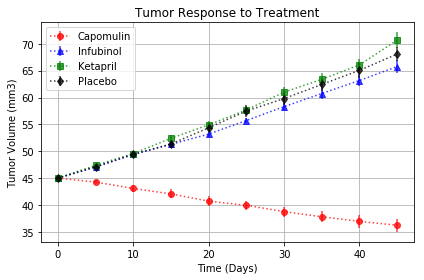

In [82]:
# Generate the Plot (with Error Bars)
#first display timpoint values as x axis using arange
x= np.arange(0,50,5)

#get individual columns of mean tumor vols
Capomulin= multi_indexed_df.iloc[:,0]
Infubinol= multi_indexed_df.iloc[:,2]
Ketapril= multi_indexed_df.iloc[:,3]
Placebo= multi_indexed_df.iloc[:,5]

#reshape std error data
df_reshaped = df_1.pivot_table('Tumor Volume (mm3)','Timepoint',["Drug"])

#get the y-error for each drug
e1 = df_reshaped.iloc[:,0]
e2 = df_reshaped.iloc[:,2]
e3 = df_reshaped.iloc[:,3]
e4 = df_reshaped.iloc[:,5]

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()


ax.errorbar(x,Capomulin,yerr=e1, color="red",fmt="o",alpha=0.75,linestyle='dotted', label="Capomulin")
ax.errorbar(x,Infubinol,yerr=e2, color = "blue", fmt= "^",alpha=0.75,linestyle='dotted', label="Infubinol")
ax.errorbar(x,Ketapril,yerr=e3,  color="green", fmt = "s",alpha=0.75,linestyle='dotted', label="Ketapril")
ax.errorbar(x,Placebo,yerr=e4,  color = "black",fmt ="d",alpha=0.75, linestyle='dotted',label="Placebo")

plt.grid()
plt.title("Tumor Response")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.legend(loc = "best")

# Save the Figure

plt.savefig("../Untitled Folder/TumorResponseToTreatment.png")



In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [81]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_new = pd.merge(clinical_data,mouse_data,how ="left", on = "Mouse ID")

metastatic_data = combined_new.groupby(["Drug","Timepoint"])

met_mean = metastatic_data["Metastatic Sites"].mean()

met_mean
# Convert to DataFrame
met_df = pd.DataFrame(met_mean).reset_index()

# Preview DataFrame
met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [83]:
metastat_se = metastatic_data["Metastatic Sites"].sem()
# Convert to DataFrame
met_df1 = pd.DataFrame(metastat_se).reset_index()
# Preview DataFrame
met_df1.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [85]:
# Minor Data Munging to Re-Format the Data Frames
met_reshaped = met_df.pivot_table('Metastatic Sites','Timepoint',"Drug")
# Preview that Reformatting worked
met_reshaped.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


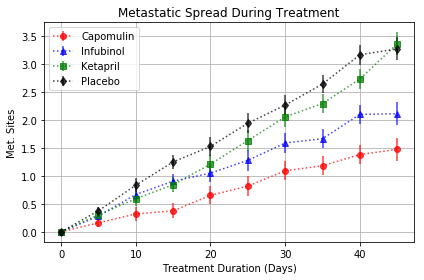

In [93]:
#same process as above
#first display timepoint as x axis
x_meta= np.arange(0,50,5)

#get columns of every individual drug
Capomulinmt= met_reshaped.iloc[:,0]
Infubinolmt= met_reshaped.iloc[:,2]
Ketaprilmt= met_reshaped.iloc[:,3]
Placebomt= met_reshaped.iloc[:,5]

#reshape the meta se data

met_new = met_df1.pivot_table('Metastatic Sites','Timepoint',['Drug'])
m1 = met_new.iloc[:,0]
m2 = met_new.iloc[:,2]
m3 = met_new.iloc[:,3]
m4 = met_new.iloc[:,5]

fig1, ax1 = plt.subplots()
ax1.errorbar(x_meta,Capomulinmt,yerr = m1,color="red",fmt="o",alpha=0.75, linestyle='dotted',label="Capomulin")
ax1.errorbar(x_meta,Infubinolmt,yerr = m1,color="blue",fmt="^",alpha=0.75, linestyle='dotted',label="Infubinol")
ax1.errorbar(x_meta,Ketaprilmt,yerr = m1,color="green",fmt="s",alpha=0.75, linestyle='dotted',label="Ketapril")
ax1.errorbar(x_meta,Placebomt,yerr = m1,color="black",fmt="d",alpha=0.75, linestyle='dotted',label="Placebo")


plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration in Days")
plt.ylabel("Met. Sites")
plt.legend(loc = "best")
plt.grid()
plt.tight_layout()

# Save the Figure
plt.savefig("../Untitled Folder/MetastaticSpread.png")
# Show the Figure
plt.show()

## Survival Rates

In [95]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_grp = combined_new.groupby(["Drug","Timepoint"])
count_mc = mice_grp["Mouse ID"].count()
# Convert to DataFrame
count_df = pd.DataFrame(count_mc).reset_index()
count_df = count_df.rename(columns = {'Mouse ID':'Mouse Count'})
# Preview DataFrame
count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [13]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined